In [1]:
from plotnine.data import mpg

In [2]:
#dataframe
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


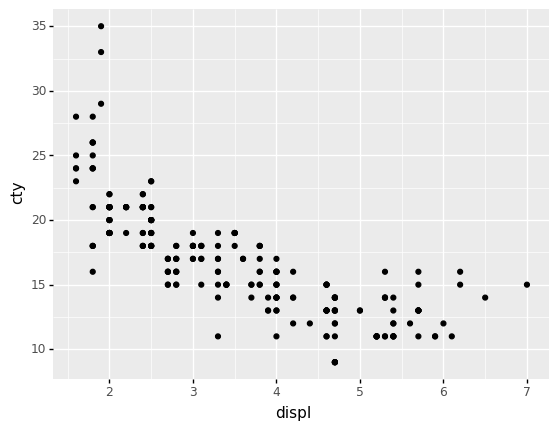

<ggplot: (163941214136)>

In [3]:
# 散点图
from plotnine import qplot

qplot(x='displ', 
      y='cty',
      data=mpg)

## ggplot图层
qplot是快速作图函数，如果想让图更好看，进行私人订制，那么我们需要进行图层设计

首先设置ggplot图层（相当于买了一个高级画布），
- 数据mpg
- 横坐标x轴为displ
- 纵坐标y轴cty  
在plotnine中，变量所对应的数据均可通过字段名调用

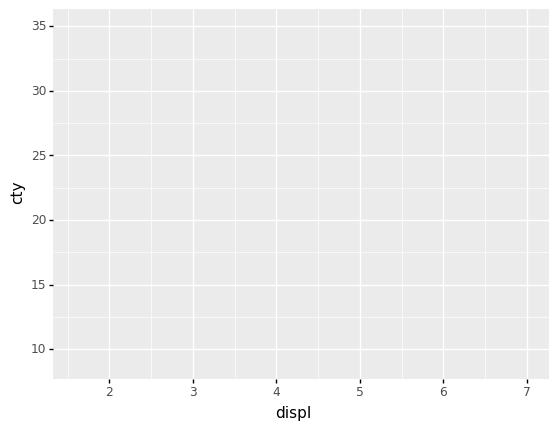

<ggplot: (163941234098)>

In [4]:
from plotnine import ggplot, geom_point, aes

ggplot(aes(x='displ', y='cty'), mpg)

## 图层叠加
我们可以看到，已经绘制出一个空的ggplot图层，x轴为displ，y轴为cty。

接下来我们给这个图层上加上数据对应的散点，使用geom_point()直接追加在ggplot图层之上即可。

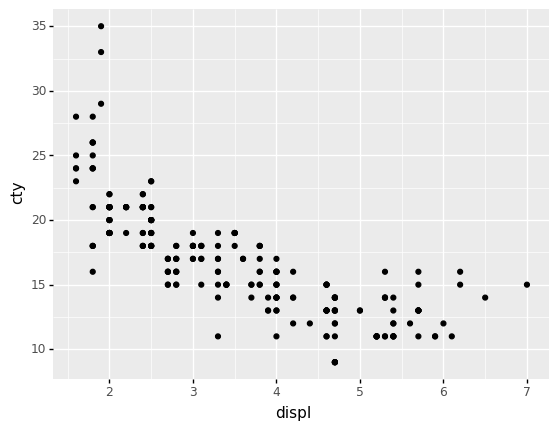

<ggplot: (163941783869)>

In [5]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point()
)

## color
在上图中，散点是没有区分每辆车的气缸数cyl。

在geom_point()中，我们可以按照气缸数cyl分门别类，按照颜色显示出来

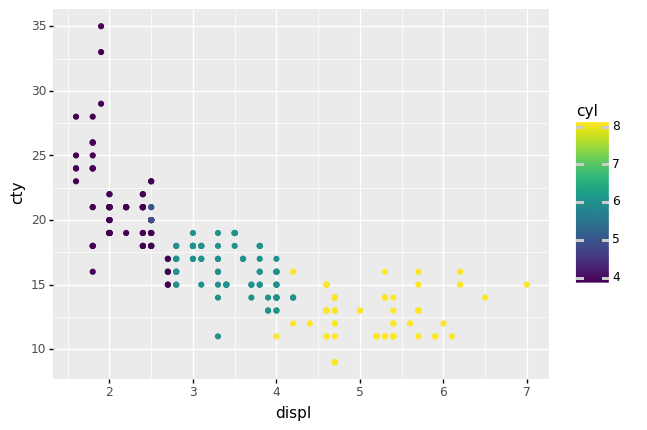

<ggplot: (163941774258)>

In [6]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='cyl'))
)

上图挺好看的，有时候需要绘制的字段是离散型数值，但是上色后可能不够明显，需要声明该字段为离散型。这时候用factor()来告诉plotnine，这个字段是离散型数值

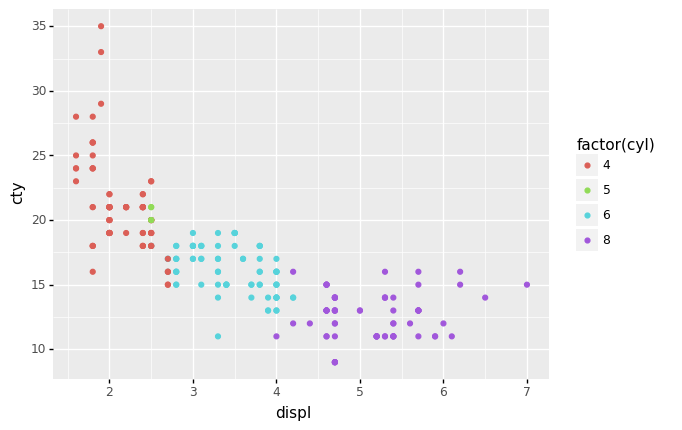

<ggplot: (163941864102)>

In [7]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='factor(cyl)')) 
)

## size
有时候为了增加可视化显示的维度数，还可以考虑加入点的大小size

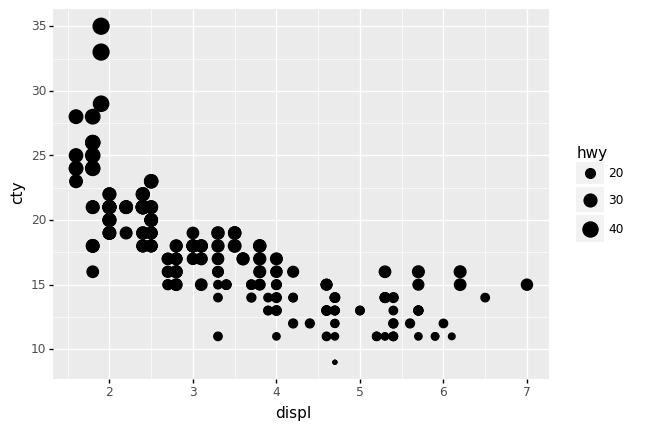

<ggplot: (163941781745)>

In [8]:
(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(size='hwy'))
)

## 梯度色
如果你想自己设置颜色的梯度，可以通过scale_color_gradient设置

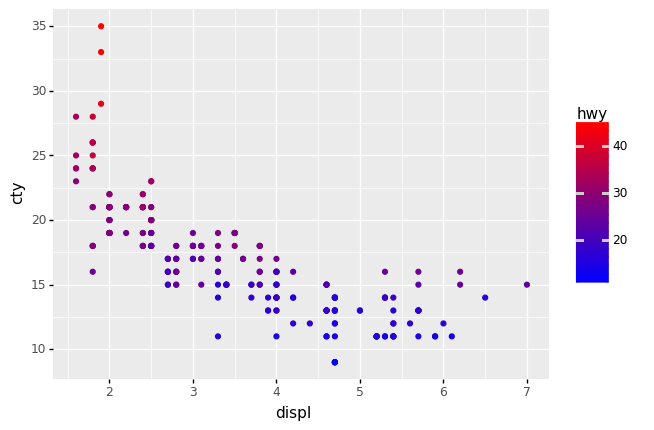

<ggplot: (163941900737)>

In [9]:
from plotnine import scale_color_gradient

(
    ggplot(aes(x='displ', y='cty'), mpg)
    + geom_point(aes(color='hwy'))
    + scale_color_gradient(low='blue', high='red')
)

In [10]:
# 条形图
import pandas as pd

df = pd.DataFrame({
    'variable': ['gender', 'gender', 'age', 'age', 'age', 'income', 'income', 'income', 'income'],
    'category': ['Female', 'Male', '1-24', '25-54', '55+', 'Lo', 'Lo-Med', 'Med', 'High'],
    'value': [60, 40, 50, 30, 20, 10, 25, 25, 40],
})
df['variable'] = pd.Categorical(df['variable'], categories=['gender', 'age', 'income'])
df['category'] = pd.Categorical(df['category'], categories=df['category'])

df

,variable,category,value
0,gender,Female,60
1,gender,Male,40
2,age,1-24,50
3,age,25-54,30
4,age,55+,20
5,income,Lo,10
6,income,Lo-Med,25
7,income,Med,25
8,income,High,40


In [ ]:
from plotnine import ggplot, aes, geom_text, position_dodge, geom_point

#调整文本位置
dodge_text = position_dodge(width=0.9)                              # new

(
    ggplot(df, aes(x='variable', 
                   y='value', 
                   fill='category')) #类别填充颜色
    + geom_col(position='dodge', 
               show_legend=False)   # modified
    + geom_text(aes(y=-.5, label='category'),                          # new
                position=dodge_text,
                color='gray',  #文本颜色
                size=8,   #字号
                angle=30, #文本的角度
                va='top')
    
 + lims(y=(-5, 60))                                                 # new
)

In [12]:
from plotnine.data import economics
save_rate = economics[economics['date']>'2013-01-01']
save_rate=save_rate.reset_index(drop=True)

In [13]:
(
ggplot(save_rate)#传入数据集
+ geom_line(aes(x='date',y='psavert'))#传入映射和几何对象
)

NameError: name 'geom_line' is not defined

In [14]:
import pandas as pd
from plotnine import *

In [22]:
df = pd.read_excel('data1.xlsx')

In [23]:
df

,weekly,Sell-out(2021),Sell-out(2022)
0,W01,34598,39712.0
1,W02,69296,53605.0
2,W03,60436,37157.0
3,W04,69650,49323.0
4,W05,69177,43531.0
5,W06,58160,65662.0
6,W07,56664,52352.0
7,W08,41149,64300.0
8,W09,63020,42515.0
9,W10,42165,52439.0


D:\opt\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
D:\opt\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 37 rows containing missing values.
D:\opt\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
D:\opt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
D:\opt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
D:\opt\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29699 (\N{CJK UNIFIED IDEOGRAPH-7403}) missing from current font.
D:\opt\anaconda3\lib\site-packages\IPython

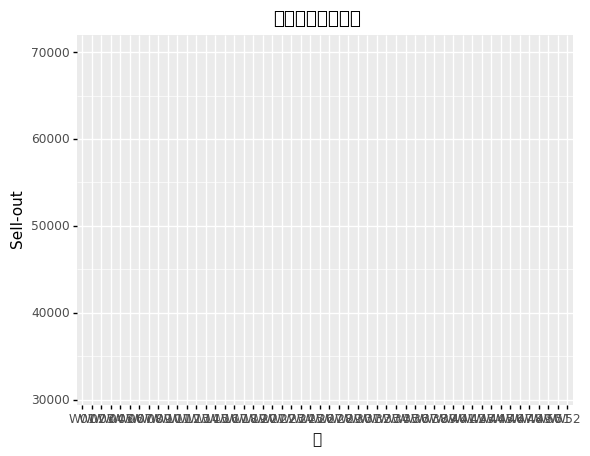

<ggplot: (163941791359)>

In [29]:
(
ggplot(df,aes(x='weekly'))
+ geom_line(aes(y='Sell-out(2021)'))#折线图线条粗细
+ geom_line(aes(y='Sell-out(2022)'))
# + ylim(0,6)#y轴的范围
+ labs(title='全球手机销售周报',
           x='周',
           y='Sell-out')
)